In [13]:
# Add directory above current directory to path
import sys as SYS; SYS.path.insert(0, '..')

In [22]:
from src.random_hamiltonian import random_unitary
import matplotlib.pyplot as plt
import numpy as np
rng = np.random.default_rng()

from src import measurements as measure, density_matrix as DM

import time

In [23]:
def line_order(n):
    shift = rng.integers(n)
    return lambda:  np.roll(list(range(n)), shift)

def random_order(n):
    return lambda: rng.permutation(n)

In [24]:
def run_n_trials(qm_sys: DM.DensityMatrix, num_blocks: int, measurment, num_trials: int, possible_orders):
    start = time.time()
    N = qm_sys.number_of_qbits

    measurments = np.array(measurment(qm_sys))

    assert N % num_blocks == 0, f"num_block = {num_blocks} must divide the size of the system {N}"
    block_size = N // num_blocks
    for i in range(num_trials):
        sub_system_unitaries = [random_unitary(block_size) for _ in range(num_blocks)]
        U = DM.tensor(sub_system_unitaries)

        # shift the order of the qbits

        order = possible_orders()

        U.relabel_basis(order)
        U.change_to_energy_basis()

        qm_sys = U * qm_sys * U.H

        measurments = np.vstack((measurments, measurment(qm_sys)))
    print(f"{np.round(time.time() - start, 2)} seconds elapsed")
    return measurments

In [25]:
N = 8
num_blocks = 2
pops = [.1, .1, .1, .1, .4, .4, .4, .4]
my_sys = DM.n_thermal_qbits(pops)
my_sys.change_to_energy_basis()

In [26]:
extractable_work = run_n_trials(my_sys,num_blocks,measure.extractable_work_of_each_qubit,50,random_order(8))

7.45 seconds elapsed


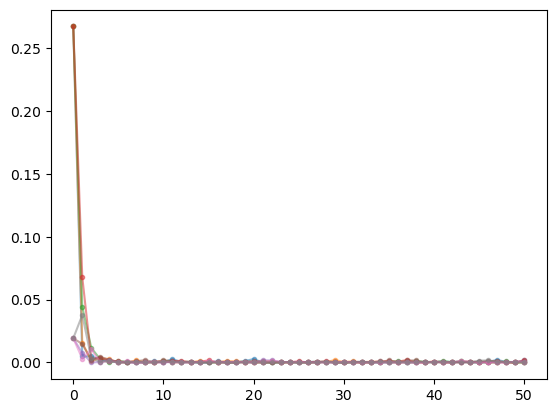

In [27]:
plt.plot(np.real(extractable_work),linestyle='-', marker='.',alpha = .5)
plt.show()

In [21]:
#this gets the change in work between each time step
change_in_work = extractable_work[1:]-extractable_work[:-1]

#this finds where the change in work is greater than zero (a larger cutoff can be used here to find more significant changes)
where_positive = change_in_work>0

#find the number of positive changes
num_positive_change = np.sum(where_positive)
print(num_positive_change)

#find the percent of positive changes
num_positive_change/(len(change_in_work)*N)


189


0.4725